In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from ietf_wg_mb_extractor import IETF_WG_MB_Extractor
from argparse import ArgumentParser

%load_ext autoreload
%autoreload 2
from explore_data import DataExplorer
from prepare_data import DataPreparator

In [2]:
def set_parameters(grid_color, axes_edgecolor, axes_facecolor, figsize):
    sns.set(rc={"grid.color": grid_color, 
                "axes.edgecolor": axes_edgecolor, 
                "axes.facecolor": axes_facecolor,
                'figure.figsize': figsize})

In [3]:
set_parameters(grid_color="#99e2b4", axes_edgecolor="#99e2b4", axes_facecolor="#e6ffed", figsize=(9, 5))

In [4]:
archive_path = 'email-archives/'

In [5]:
extractor = IETF_WG_MB_Extractor(archive_path)
extractor.combine_wg_files(ratio=None)
active_wg_dataframe = extractor.get_combined_wg_dataframes()

Successfully scraped active WG names
------------------------------------
Successfully extracted names of active WGs existing in files
------------------------------------------------------------
Successfully converted and concatenated all .csv files into one dataframe
-------------------------------------------------------------------------


In [24]:
data_preparator = DataPreparator(extractor)
clean_wg_dataframe = data_preparator.emails_df_cleaning(active_wg_dataframe)
processed_bodies = data_preparator.preprocess_bodies()
text_coll_combined = data_preparator.wg_combined_bodies_to_dict(processed_bodies)
text_coll_default = data_preparator.wg_bodies_to_dict(processed_bodies)

data_explorer = DataExplorer(colors = ['#eee82c', '#91cb3e', '#17A72D', '#4c934c','#368245'])

Initial dataframe shape: (534132, 8)
-----------------------------------------
Dataframe shape after cleaning: (47593, 9)

------PROCESSING------



 ... (more hidden) ...


Prepocessing time: 38.66 s.

Number of mails removed: 7342
---------------------------------------
Encrypted messages: 3439
Ill-formated messages: 208
Announc. messages: 3693
Unknown endcoding messages: 2
Empty messages (after pre-processing): 765
---------------------------------------
Total number of mails after processing: 39486


In [7]:
test_wg = 'netmod'

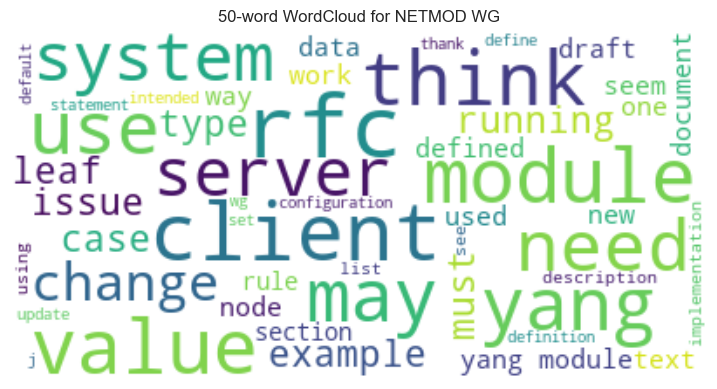

In [25]:
data_explorer.wg_wordcloud(text_coll_combined ,test_wg, max_words=50)

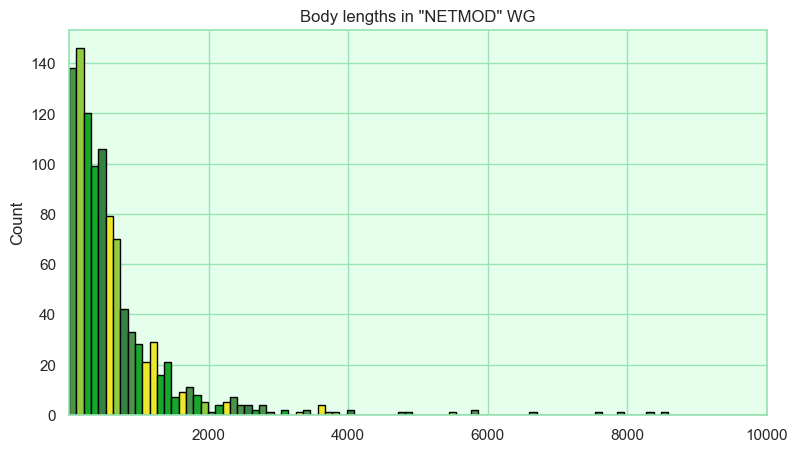

In [26]:
data_explorer.wg_body_len_dist(text_coll_default, test_wg, bins=110)

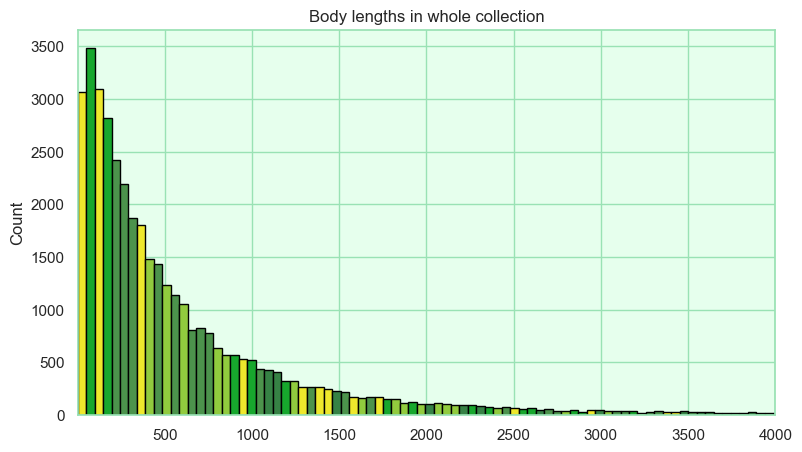

In [27]:
data_explorer.wg_body_len_dist(text_coll_default, bins=2500, whole=True, limit=4000)

In [32]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='count', 
                               wgs=list(text_coll_combined.keys())[:8], 
                               ngram_range=(1,1), 
                               min_df=1)

             bier  asdf  manet  dmm  extra  6lo  babel  regext  total_count
would         207    60     68   47     93   87    147     291         1000
rfc           171     5     35    9     89  117    187     358          971
wg            228   193     23   20     23  329     73      50          939
section       144     3     22   27    199   91    114     302          902
document      210    11     12   65     76   59     76     339          848
draft         291    28     42   55     26   68     65     146          721
bier          627     4      0    0      0    8      1       0          640
use            84    33     41   52     58   41     86     208          603
think         129    23     40   25     86   39     88     130          560
one           106    34     63   34     59   39     73     141          549
also          126    35     29   28     68   55     62     144          547
address        49    17     40   36     18  108    172      92          532
session     

In [33]:
data_explorer.ngram_vectorizer(text_coll_combined, 
                               vectorizer_type='tf_idf', 
                               wgs=list(text_coll_combined.keys())[:6], 
                               ngram_range=(1,1), 
                               min_df=1)

            bier   asdf  manet    dmm  extra    6lo  highest_score
bier       0.618  0.010  0.000  0.000  0.000  0.013          0.618
rm         0.000  0.350  0.000  0.000  0.000  0.555          0.555
dlep       0.000  0.000  0.382  0.000  0.000  0.000          0.382
sdf        0.000  0.368  0.000  0.000  0.000  0.000          0.368
gnb        0.000  0.000  0.000  0.360  0.000  0.000          0.360
wg         0.144  0.300  0.055  0.035  0.036  0.351          0.351
section    0.091  0.005  0.053  0.047  0.316  0.097          0.316
upf        0.000  0.000  0.000  0.312  0.000  0.000          0.312
gtpyou     0.000  0.000  0.000  0.265  0.000  0.000          0.265
imap       0.000  0.000  0.000  0.000  0.232  0.000          0.232
hall       0.000  0.232  0.000  0.000  0.000  0.159          0.232
srv        0.046  0.000  0.000  0.227  0.010  0.000          0.227
router     0.009  0.000  0.220  0.009  0.000  0.024          0.220
frequency  0.000  0.000  0.204  0.000  0.000  0.000          0

In [36]:
data_explorer.sent_lex_vectorizer(text_coll_combined,
                                 wgs=list(text_coll_combined.keys())[:8])

                     bier  asdf  manet  dmm  extra  6lo  babel  regext  \
best_pos               24     1      7    0     11    1      7      28   
failure_neg            39     0      1    2     11    0      1       4   
happy_pos              19     1      1    1     11    2      8      12   
wrong_neg               7     0      1    3      4    3     12      13   
free_pos                7     0      3    2      3    9      3      15   
kind_pos                6     6      3    3     10    2      3       7   
great_pos              10     2      2    2      6    6      6       5   
pretty_pos              5     4      1    0      8    4     11       5   
appreciated_pos         5     0      1    0      2    9      5      12   
strong_pos              8     0      0    0      1    2      3      18   
trusted_pos             0     5      0    0      0    9      5      10   
bad_neg                 3     0      4    0      8    1      8       5   
abuse_neg               2     0      0

In [39]:
list(text_coll_default.items())[:2]

[('6lo',
  ['here is my usual eclectic condensed agenda based on the draft agenda for ietf remember that there is still quite some potential for changes the iotrelevant conflicts that meet the eye this time are lakerats iotopscose coredanish in order from hurtful to disastrous rollsuit and lpwanrats are probably bearable all times on my agenda are in utc the default page is utc might be handy grcbecausecfe carsten monday march hackathon kickoff rm gen hackathon hackathon thursday march technology deep dive rm tdd technology deep dive friday march hackathon closing rm gen hackathon hackathon monday march session i rm art dispatch dispatch wg joint with artarea rm irtf irtfopen irtf open meeting rm rtg raw reliable and available wireless wg rm sec emu eap method update wg session ii rm art asdf a semantic definition format for data and interactions of things wg rm irtf panrg path aware networking rg rm rtg detnet deterministic networking wg rm sec mls messaging layer security wg session 

In [50]:
# Words alltogether
len(all_words)

2493979

In [52]:
# Distinct words 
len(set(all_words))

70856

In [54]:
# Sorting words to potentially detect other language / errenous words 
distinct_words = list(set(all_words))
distinct_words.sort(reverse=True)
for i, word in enumerate(distinct_words):
    print(i, word

0 𝔈𝔗ℌ
1 화
2 작성
3 일
4 이가
5 월
6 오후
7 오전
8 에
9 쓴
10 수
11 님이
12 년
13 글
14 题re
15 题
16 间
17 邵晴
18 邮件原文发件人ketan
19 邮件原文发件人internetdrafts
20 邮件原文发件人henderickx
21 邮件原文
22 邮件原件
23 送
24 胡志波
25 答复
26 移动研究院mobile
27 移动研究院
28 磅
29 申し上げますご面倒をおかけいたしますがご理解賜りますよう
30 無
31 潘伟
32 東京
33 杨锋
34 杀鸡用牛刀
35 本邮件及其附件含有华为公司的保密信息仅限于发送给上面地址中列出的个人或群组禁止任何其他人以任何形式使用包括但不限于全部或部分地泄露复制或散发本邮件中的信息如果您错收了本邮件请您立即电话或邮件通知发件人并删除本邮件
36 期
37 暗号化システムを導入しておりますパスワードは別途お知らせ
38 晚上
39 星期日收件人
40 星期四收件人
41 星期六收件人
42 星期五收件人
43 星期二收件人
44 星期三收件人
45 星期一收件人
46 星期一
47 时间
48 时
49 日期
50 日
51 无发送时间
52 收件人张征tteietf
53 收件人张征
54 收件人姜文颖
55 收件人zhuangshunwan
56 收件人nbsp一念之后だzhouminggt
57 收件人mpls
58 收件人leonard
59 收件人james
60 收件人ietf
61 收件人huzhibo
62 收件人
63 抄送人lennymbonedwanghaojie
64 抄送人lennymboned
65 抄送人bier
66 抄送人
67 抄送springchairs
68 抄送nbsptsvwgtsvwggtdraftietftsvwgbisdraftietftsvwgbisgtgtgorrygorrygt
69 抄送nbsptsvwgtsvwggtdraftietftsvwgbisdraftietftsvwgbisgt
70 抄送
71 抄
72 慶一
73 微信
74 弊社では情報セキュリティを強化する為メール添付ファイル自動
75 年月日火
76 年月日水
77 年月日木
78 年月日月
79 年月日星期一


In [201]:
# Checking amount of words per group, as well as amount of distinc words
for wg, doc in text_collection.items():
    print(f"Total num. of words in {wg}: {len(doc)}")
    print(f"Total num. of distinct words in {wg}: {len(set(doc))}")
    print(f"Proportion of distinct words given the total num. of words: {len(set(doc)) / len(doc):.2f}")
    print("\n\n===================\n\n")

Total num. of words in stir: 21380
Total num. of distinct words in stir: 3721
Proportion of distinct words given the total num. of words: 0.17




Total num. of words in cdni: 17475
Total num. of distinct words in cdni: 3033
Proportion of distinct words given the total num. of words: 0.17




Total num. of words in jmap: 11803
Total num. of distinct words in jmap: 2832
Proportion of distinct words given the total num. of words: 0.24




Total num. of words in bess: 81563
Total num. of distinct words in bess: 7291
Proportion of distinct words given the total num. of words: 0.09




Total num. of words in lsr: 111277
Total num. of distinct words in lsr: 8470
Proportion of distinct words given the total num. of words: 0.08




Total num. of words in pals: 5035
Total num. of distinct words in pals: 1666
Proportion of distinct words given the total num. of words: 0.33




Total num. of words in mls: 22203
Total num. of distinct words in mls: 4277
Proportion of distinct words given the total

In [ ]:
# DEFINE TEFCHNICAL WORDS (THE OPPOSITE OF THE SENTIMENT WORDS)
# MAYBE DELETE SOME OF THEM LATER FOR THE SAKE OF KEEPING THEM AWAY AS BEING NOISY OR SOMETHING
# WE CAN ALSO USE TF-IDF WEIGTING FOR WORD APPEARING ONCE OR TWICE SO THAT THEY ALSO CAN EIITHER BE FIXED
# OR REMOVED, THUS BEING A PART OF POST PROCESSING PIPE-LINE